In [2]:
import pandas as pd
import os
import sqlite3

df_final = None  # Inicializa como None para evitar concatenação errada

# Caminho da pasta
caminho_pasta = "G:\Meu Drive\Teste empresa Use Uniformes\Data\Escolas"

# Lista de arquivos CSV
arquivos_csv = [os.path.join(caminho_pasta, f) for f in os.listdir(caminho_pasta) if f.endswith('.csv')]

# Lista de nomes corretos com tipos de dados
schema_tabela = {
    "CODESC": "INTEGER PRIMARY KEY",
    "DRE": "TEXT",
    "TIPOESC": "TEXT",
    "NOMESC": "TEXT",
    "NOMESCOF": "TEXT",
    "CEU": "TEXT",
    "DIRETORIA": "TEXT",
    "SUBPREF": "TEXT",
    "ENDERECO": "TEXT",
    "NUMERO": "INTEGER",
    "BAIRRO": "TEXT",
    "CEP": "INTEGER",
    "TEL1": "TEXT",
    "TEL2": "TEXT",
    "FAX": "TEXT",
    "SITUACAO": "TEXT",
    "CODDIST": "INTEGER",
    "DISTRITO": "TEXT",
    "SETOR": "INTEGER",
    "CODINEP": "INTEGER",
    "CODCIE": "INTEGER",
    "EH": "TEXT",
    "FX_ETARIA": "TEXT",
    "DT_CRIACAO": "DATE",
    "ATO_CRIACAO": "TEXT",
    "DOM_CRIACAO": "DATE",
    "DT_INI_FUNC": "DATE",
    "DT_INI_CONV": "DATE",
    "DT_AUTORIZA": "DATE",
    "DT_EXTINCAO": "DATE",
    "NOME_ANT": "TEXT",
    "REDE": "TEXT",
    "LATITUDE": "TEXT",
    "LONGITUDE": "TEXT",
    "DATABASE": "DATE"
}

# Dicionário de nomes errados para corretos
nome_errado_ecorreto = {
    "NOMES": "NOMESC", "NOMESCOFI": "NOMESCOF", "CD_CIE": "CODCIE", "CDIST": "CODDIST",
    "FX_ETARIA.1": "FX_ETARIA", "Ï»¿DRE": "DRE", "DOC_CRIACAO": "DT_CRIACAO", "DT_EXTINTAO": "DT_EXTINCAO"
}

# Conectar ao banco SQLite
conn = sqlite3.connect("teste_analytics2.db")
cursor = conn.cursor()

# Criar tabelas antes da inserção de dados
for arquivo in arquivos_csv:
    nome_tabela = os.path.basename(arquivo)[:-4]  # Remove extensão .csv
    
    # Criar a estrutura da tabela com os tipos corretos
    colunas_sql = ", ".join([f'"{col}" {tipo}' for col, tipo in schema_tabela.items()])
    cursor.execute(f'CREATE TABLE IF NOT EXISTS "{nome_tabela}" ({colunas_sql})')

# Inserir os dados nos arquivos CSV
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo, encoding="latin1", sep=";")
    
    # Padroniza os nomes das colunas (tira espaços e deixa maiúsculo)
    df.columns = df.columns.str.strip().str.upper()
    
    # Renomeia colunas erradas se existirem no dicionário
    df = df.rename(columns={col: nome_errado_ecorreto[col] for col in df.columns if col in nome_errado_ecorreto})
    
    # Remove colunas duplicadas caso existam
    df = df.loc[:, ~df.columns.duplicated()]
    
    # Remove colunas que não estão na lista de nomes corretos
    df = df[[col for col in schema_tabela.keys() if col in df.columns]]
    
    # Verifica se df_final já tem dados
    if df_final is None:
        df_final = df  # Inicializa o df_final na primeira iteração
    else:
        df_final = pd.concat([df_final, df], ignore_index=True)

    # Nome da tabela será o nome do arquivo sem extensão
    nome_tabela = os.path.basename(arquivo)[:-4]
    
    # Salvar a tabela no banco, substituindo caso já exista
    df.to_sql(nome_tabela, conn, if_exists="replace", index=False)

    print(f"Importação do arquivo '{os.path.basename(arquivo)}' concluída com sucesso!")

# Fechar conexão com o banco
conn.close()

print("Processo concluído! Todas as tabelas foram inseridas no banco de dados com os tipos de dados corretos.")


<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Win\AppData\Local\Temp\ipykernel_2604\2328153986.py:8: SyntaxWarning: invalid escape sequence '\M'
  caminho_pasta = "G:\Meu Drive\Teste empresa Use Uniformes\Data\Escolas"


Importação do arquivo 'escolas-dez-2012.csv' concluída com sucesso!
Importação do arquivo 'escolas-dez-2011.csv' concluída com sucesso!
Importação do arquivo 'escolas122018.csv' concluída com sucesso!
Importação do arquivo 'escolas-dez-2010.csv' concluída com sucesso!
Importação do arquivo 'escolas122019.csv' concluída com sucesso!
Importação do arquivo 'escolas-dez-2015.csv' concluída com sucesso!
Importação do arquivo 'escolasr34.csv' concluída com sucesso!
Importação do arquivo 'escolas122020.csv' concluída com sucesso!
Importação do arquivo 'escolas122021.csv' concluída com sucesso!
Importação do arquivo 'escolas-dez-2014.csv' concluída com sucesso!
Importação do arquivo 'escolasr34dez2017.csv' concluída com sucesso!
Importação do arquivo 'escolas-dez-2013.csv' concluída com sucesso!
Importação do arquivo 'escolas122023.csv' concluída com sucesso!
Importação do arquivo 'escolas122022.csv' concluída com sucesso!
Processo concluído! Todas as tabelas foram inseridas no banco de dados 

In [9]:
import sqlite3

# Conectar ao banco de dados SQLite
conexao = sqlite3.connect("teste_analytics2.db")
cursor = conexao.cursor()

# Obter todas as tabelas que começam com "escola"
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name LIKE 'escola%'")
tabelas = cursor.fetchall()

# Iterar sobre cada tabela e verificar colunas
for tabela in tabelas:
    nome_tabela = tabela[0]
  
  
    
    # Obter as colunas atuais da tabela
    cursor.execute(f'PRAGMA table_info("{nome_tabela}")')
    colunas_atuais = [col[1] for col in cursor.fetchall()]  # Índice 1 contém o nome da coluna
    
    # Descobrir colunas ausentes
    colunas_faltantes = [col for col in schema_tabela.keys() if col not in colunas_atuais]
    
    if colunas_faltantes:
        print(f"Tabela '{nome_tabela}' está faltando as colunas: {colunas_faltantes}")
        
        # Adicionar as colunas ausentes na ordem correta com os tipos de dados corretos
        for coluna in colunas_faltantes:
            cursor.execute(f'ALTER TABLE "{nome_tabela}" ADD COLUMN "{coluna}" {schema_tabela[coluna]}')
        
        print(f"Colunas ausentes adicionadas à tabela '{nome_tabela}' com sucesso.")

# Confirmar alterações e fechar conexão
conexao.commit()
cursor.close()
conexao.close()

print("Processo concluído! Todas as tabelas 'escola%' foram verificadas e corrigidas.")


Tabela 'escolas-dez-2012' está faltando as colunas: ['DT_INI_FUNC']
Colunas ausentes adicionadas à tabela 'escolas-dez-2012' com sucesso.
Tabela 'escolas-dez-2011' está faltando as colunas: ['DT_INI_FUNC']
Colunas ausentes adicionadas à tabela 'escolas-dez-2011' com sucesso.
Tabela 'escolas122018' está faltando as colunas: ['NOMESCOF', 'DOM_CRIACAO']
Colunas ausentes adicionadas à tabela 'escolas122018' com sucesso.
Tabela 'escolas-dez-2010' está faltando as colunas: ['DT_INI_FUNC']
Colunas ausentes adicionadas à tabela 'escolas-dez-2010' com sucesso.
Tabela 'escolas122019' está faltando as colunas: ['NOMESCOF']
Colunas ausentes adicionadas à tabela 'escolas122019' com sucesso.
Tabela 'escolas-dez-2015' está faltando as colunas: ['DT_INI_FUNC']
Colunas ausentes adicionadas à tabela 'escolas-dez-2015' com sucesso.
Tabela 'escolasr34' está faltando as colunas: ['NOMESCOF', 'FX_ETARIA', 'DT_INI_CONV', 'DT_EXTINCAO']
Colunas ausentes adicionadas à tabela 'escolasr34' com sucesso.
Tabela 'e

In [4]:
import pandas as pd
import os
import sqlite3

df_final = None  # Inicializa como None para evitar concatenação errada

# Caminho da pasta
caminho_pasta = "G:\Meu Drive\Teste empresa Use Uniformes\Data\Perfil dos educandos"

# Lista de arquivos CSV
arquivos_csv = [os.path.join(caminho_pasta, f) for f in os.listdir(caminho_pasta) if f.endswith('.csv')]

# Lista de nomes corretos com tipos de dados
schema_tabela = {
    "CODESC": "INTEGER NOT NULL",
    "ANO": "INTEGER",
    "DATABASE": "DATE",
    "DESCSERIE": "TEXT",
    "DESCTURNO": "INTEGER",
    "DISTRITO": "TEXT",
    "DRE": "TEXT",
    "IDADE": "INTEGER",
    "MODAL": "TEXT",
    "NEE": "TEXT",
    "NOMESC": "TEXT",
    "PERIODO": "TEXT",
    "QTDE": "INTEGER",
    "RACA": "TEXT",
    "REDE": "TEXT",
    "SETOR": "TEXT",
    "SEXO": "TEXT",
    "TIPOESC": "TEXT",
    "TURNO": "INTEGER"
}

# Dicionário de nomes errados para corretos
nome_errado_ecorreto = {
    "CODES": "CODESC",
    "Ï»¿DRE": "DRE",  
    "QTD": "QTDE",
    "SETEDU": "SETOR"
}

# Conectar ao banco SQLite
conn = sqlite3.connect("teste_analytics2.db")
cursor = conn.cursor()

# Criar tabelas antes da inserção de dados
for arquivo in arquivos_csv:
    nome_tabela = os.path.basename(arquivo)[:-4]  # Remove extensão .csv
    
    # Criar a estrutura da tabela com os tipos corretos
    colunas_sql = ", ".join([f'"{col}" {tipo}' for col, tipo in schema_tabela.items()])
    cursor.execute(f'CREATE TABLE IF NOT EXISTS "{nome_tabela}" ({colunas_sql})')

# Inserir os dados nos arquivos CSV
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo, encoding="latin1", sep=";")
    
    # Padroniza os nomes das colunas (tira espaços e deixa maiúsculo)
    df.columns = df.columns.str.strip().str.upper()
    
    # Renomeia colunas erradas se existirem no dicionário
    df = df.rename(columns={col: nome_errado_ecorreto[col] for col in df.columns if col in nome_errado_ecorreto})
    
    # Remove colunas duplicadas caso existam
    df = df.loc[:, ~df.columns.duplicated()]
    
    # Remove colunas que não estão na lista de nomes corretos
    df = df[[col for col in schema_tabela.keys() if col in df.columns]]
    
    # Verifica se df_final já tem dados
    if df_final is None:
        df_final = df  # Inicializa o df_final na primeira iteração
    else:
        df_final = pd.concat([df_final, df], ignore_index=True)

    # Nome da tabela será o nome do arquivo sem extensão
    nome_tabela = os.path.basename(arquivo)[:-4]
    
    # Salvar a tabela no banco, substituindo caso já exista
    df.to_sql(nome_tabela, conn, if_exists="replace", index=False)

    print(f"Importação do arquivo '{os.path.basename(arquivo)}' concluída com sucesso!")

# Fechar conexão com o banco
conn.close()

print("Processo concluído! Todas as tabelas foram inseridas no banco de dados com os tipos de dados corretos.")

<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Win\AppData\Local\Temp\ipykernel_17296\927234417.py:8: SyntaxWarning: invalid escape sequence '\M'
  caminho_pasta = "G:\Meu Drive\Teste empresa Use Uniformes\Data\Perfil dos educandos"


Importação do arquivo 'idadeserieneeracadez17.csv' concluída com sucesso!
Importação do arquivo 'idadeserieneeracadez20.csv' concluída com sucesso!
Importação do arquivo 'idadeserieneeracadez19.csv' concluída com sucesso!
Importação do arquivo 'idadeserieneeracadez22.csv' concluída com sucesso!
Importação do arquivo 'idadeserieneeraca-r33.csv' concluída com sucesso!
Importação do arquivo 'idadeserieneeracadez18.csv' concluída com sucesso!
Importação do arquivo 'idadeserieneeracadez23.csv' concluída com sucesso!
Importação do arquivo 'idadeserieneeracadez21.csv' concluída com sucesso!
Processo concluído! Todas as tabelas foram inseridas no banco de dados com os tipos de dados corretos.


In [ ]:
import sqlite3

# Conectar ao banco de dados SQLite
conexao = sqlite3.connect("teste_analytics2.db")
cursor = conexao.cursor()

# Obter todas as tabelas que começam com "escola"
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name LIKE 'idade%'")
tabelas = cursor.fetchall()

# Iterar sobre cada tabela e verificar colunas
for tabela in tabelas:
    nome_tabela = tabela[0]
  
  
    
    # Obter as colunas atuais da tabela
    cursor.execute(f'PRAGMA table_info("{nome_tabela}")')
    colunas_atuais = [col[1] for col in cursor.fetchall()]  # Índice 1 contém o nome da coluna
    
    # Descobrir colunas ausentes
    colunas_faltantes = [col for col in schema_tabela.keys() if col not in colunas_atuais]
    
    if colunas_faltantes:
        print(f"Tabela '{nome_tabela}' está faltando as colunas: {colunas_faltantes}")
        
        # Adicionar as colunas ausentes na ordem correta com os tipos de dados corretos
        for coluna in colunas_faltantes:
            cursor.execute(f'ALTER TABLE "{nome_tabela}" ADD COLUMN "{coluna}" {schema_tabela[coluna]}')
        
        print(f"Colunas ausentes adicionadas à tabela '{nome_tabela}' com sucesso.")

# Confirmar alterações e fechar conexão
conexao.commit()
cursor.close()
conexao.close()

print("Processo concluído! Todas as tabelas 'idade%' foram verificadas e corrigidas.")

Tabela 'idadeserieneeracadez23' está faltando as colunas: ['RACA']
Colunas ausentes adicionadas à tabela 'idadeserieneeracadez23' com sucesso.
Processo concluído! Todas as tabelas 'escola%' foram verificadas e corrigidas.


In [10]:
import sqlite3

# Conectar ao banco de dados SQLite
conexao = sqlite3.connect("test_analytics.db")
cursor = conexao.cursor()

# Obter a lista de todas as tabelas do banco de dados
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tabelas = [tabela[0] for tabela in cursor.fetchall()]  # Pegando apenas os nomes das tabelas

print("\n📌 Lista de todas as tabelas no banco de dados:")
for tabela in tabelas:
    print(f"- {tabela}")

# Obter os nomes das colunas de cada tabela
print("\n📌 Estrutura das tabelas:")

for tabela in tabelas:
    cursor.execute(f'PRAGMA table_info("{tabela}")')
    colunas = [col[1] for col in cursor.fetchall()]  # O índice 1 contém os nomes das colunas




📌 Lista de todas as tabelas no banco de dados:
- idadeserieneeracadez17
- idadeserieneeracadez21
- idadeserieneeracadez20
- idadeserieneeracadez22
- idadeserieneeracadez23
- idadeserieneeracadez18
- idadeserieneeracadez19
- idadeserieneeraca-r33
- escolas-dez-2010
- escolas-dez-2011
- escolas-dez-2012
- escolas-dez-2013
- escolas-dez-2014
- escolas-dez-2015
- escolas122018
- escolas122019
- escolas122020
- escolas122021
- escolas122022
- escolas122023
- escolasr34
- escolasr34dez2017
- sqlite_sequence
- escolas

📌 Estrutura das tabelas:


In [5]:
import sqlite3
import pandas as pd
# Conectar ao banco de dados SQLite
conexao = sqlite3.connect("teste_analytics2.db")
cursor = conexao.cursor()
#create the dataframe from a query
df = pd.read_sql_query("SELECT * FROM escola_alunos", conexao)
df

,CODESC,ANO,DATABASE,DESCSERIE,DESCTURNO,DISTRITO,DRE,IDADE,MODAL,NEE,...,DT_CRIACAO,ATO_CRIACAO,DOM_CRIACAO,DT_INI_FUNC,DT_INI_CONV,DT_AUTORIZA,DT_EXTINCAO,NOME_ANT,LATITUDE,LONGITUDE
0,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,11.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
1,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,12.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
2,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,13.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
3,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,14.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
4,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,12.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979578,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,15.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None
2979579,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,15.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None
2979580,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,15.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None
2979581,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,16.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None


In [15]:
df.dtypes

CODESC           int64
ANO              int64
DATABASE        object
DESCSERIE       object
DESCTURNO       object
DISTRITO        object
DRE             object
IDADE          float64
MODAL           object
NEE             object
NOMESC          object
PERIODO         object
QTDE             int64
RACA            object
REDE            object
SETOR           object
SEXO            object
TIPOESC         object
TURNO          float64
ID_ALUNO         int64
NOMESCOF        object
CEU             object
DIRETORIA       object
SUBPREF         object
ENDERECO        object
NUMERO          object
BAIRRO          object
CEP             object
TEL1            object
TEL2            object
FAX             object
SITUACAO        object
CODDIST         object
CODINEP        float64
CODCIE          object
EH              object
FX_ETARIA       object
DT_CRIACAO      object
ATO_CRIACAO     object
DOM_CRIACAO     object
DT_INI_FUNC     object
DT_INI_CONV     object
DT_AUTORIZA     object
DT_EXTINCAO

In [25]:
print(df['SEXO'])

0          F
1          F
2          F
3          F
4          M
          ..
2979578    M
2979579    M
2979580    M
2979581    M
2979582    M
Name: SEXO, Length: 2979583, dtype: object


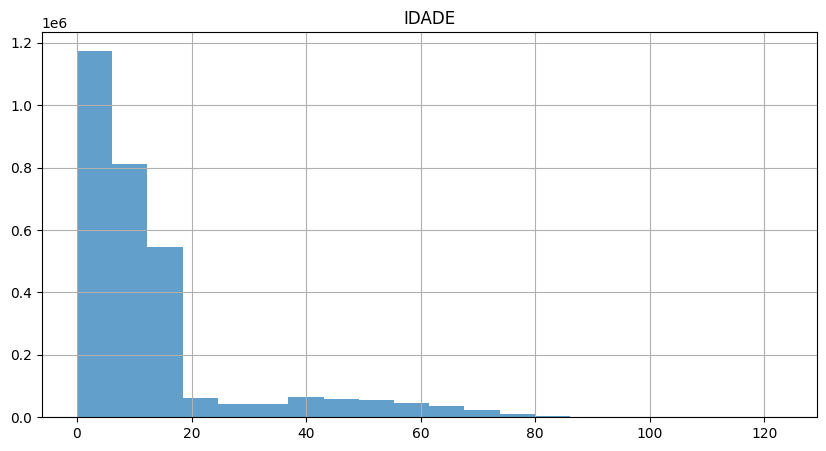

In [20]:
import matplotlib.pyplot as plt

#Plot histograms for multiple columns
df[['FX_ETARIA', 'SEXO', 'IDADE']].hist(bins=20, figsize=(10, 5), alpha=0.7)

plt.show()

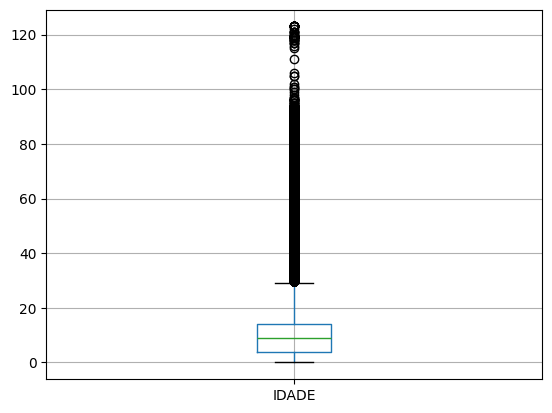

In [6]:
import matplotlib.pyplot as plt

#Plot histograms for multiple columns
boxplot = df.boxplot(column=['IDADE'])

plt.show()

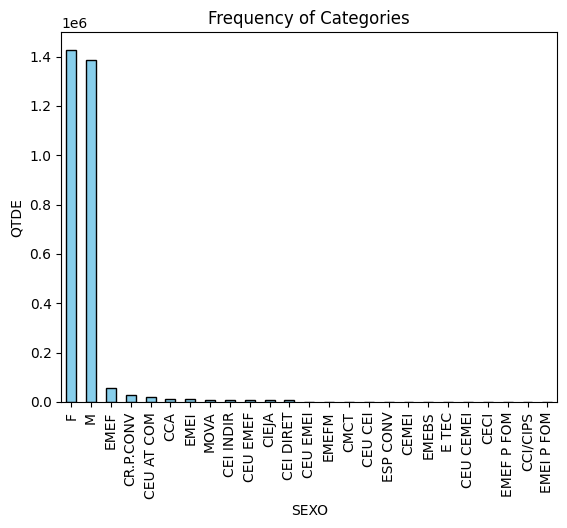

In [24]:
# Count occurrences of each category
df['SEXO'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('SEXO')
plt.ylabel('QTDE')
plt.title('Frequency of Categories')
plt.show()

In [33]:
df[(df['SEXO']=="F") | (df['SEXO']=="M")]

,CODESC,ANO,DATABASE,DESCSERIE,DESCTURNO,DISTRITO,DRE,IDADE,MODAL,NEE,...,DT_CRIACAO,ATO_CRIACAO,DOM_CRIACAO,DT_INI_FUNC,DT_INI_CONV,DT_AUTORIZA,DT_EXTINCAO,NOME_ANT,LATITUDE,LONGITUDE
0,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,11.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
1,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,12.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
2,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,13.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
3,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,14.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
4,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,12.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979578,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,15.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None
2979579,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,15.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None
2979580,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,15.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None
2979581,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,16.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None


In [34]:
df[(df['IDADE'] <= 25)]

,CODESC,ANO,DATABASE,DESCSERIE,DESCTURNO,DISTRITO,DRE,IDADE,MODAL,NEE,...,DT_CRIACAO,ATO_CRIACAO,DOM_CRIACAO,DT_INI_FUNC,DT_INI_CONV,DT_AUTORIZA,DT_EXTINCAO,NOME_ANT,LATITUDE,LONGITUDE
0,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,11.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
1,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,12.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
2,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,13.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
3,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,14.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
4,191,2017,28-dez-17,CLUBE MATEMATIC,Tarde,VILA SONIA,BT,12.0,ATCOMP,NAO POSSUI,...,27/05/1988,26.003,27/05/1988,None,16/mar/91,None,None,None,-46749888,31/12/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979578,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,15.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None
2979579,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,15.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None
2979580,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,15.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None
2979581,700044,2016,30/09/2016,FUT FUTSAL MASC,Tarde,IGUATEMI,SM,16.0,ATCOMP,NAO POSSUI,...,100000000000000000000.0,18/05/2011,None,None,None,ALTO ALEGRE,-23609738,-46426886,None,None


In [1]:
df.groupby(['DISTRITO']).count()

NameError: name 'df' is not defined